# 5주 지도학습 알고리즘2

#### 기본 라이브러리

In [3]:
%matplotlib inline
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import sklearn

### k-최근접 이웃 회귀분석
목적: 일반 회귀분석과 유사하게 인접값을 통한 예측

#### 분석할 데이터 세트

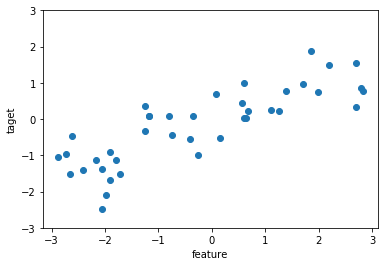

In [4]:
X, y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(X, y,'o')
plt.ylim(-3, 3)
plt.xlabel("feature")
plt.ylabel("taget")
plt.show()

#### 테스트 데이터 예측

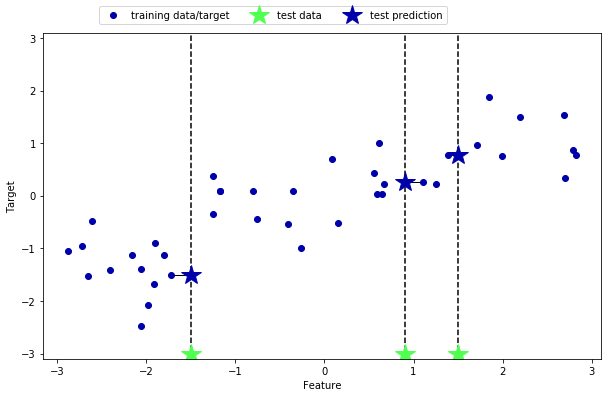

In [5]:
mglearn.plots.plot_knn_regression(n_neighbors =1)

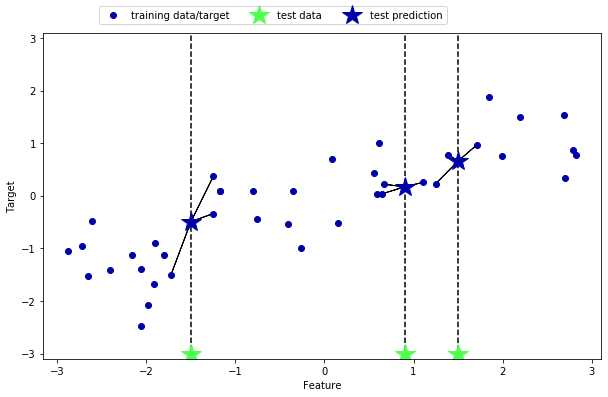

In [6]:
mglearn.plots.plot_knn_regression(n_neighbors =3)

#### [이웃값이 3이 되었을때 예측값의 위치가 바뀌었다]

#### 사이킷런의 최근접 이웃 알고리즘

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test , y_train , y_test = train_test_split (X, y, random_state = 0)
reg = KNeighborsRegressor(n_neighbors = 3)
reg.fit(X_train , y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

#### 평가용 데이터 세트 예측

In [9]:
print("평가용 데이터 세트 예측:\n", reg.predict(X_test))

평가용 데이터 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [10]:
print("평가용 데이터 세트 R^2(결정계수):{:.2f}".format(reg.score(X_test, y_test)))

평가용 데이터 세트 R^2(결정계수):0.83


### KNeighborsRegressor 분석

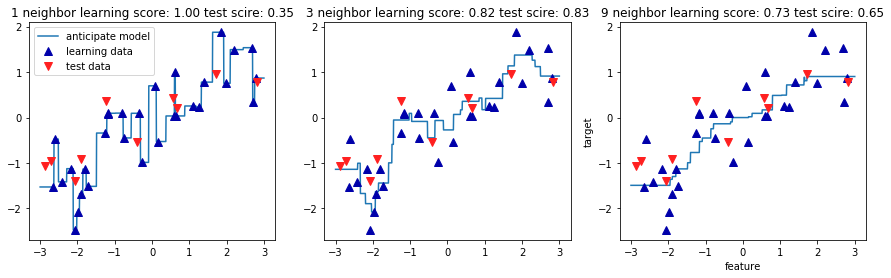

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
        "{} neighbor learning score: {:.2f} test scire: {:.2f}".format(
        n_neighbors, reg.score(X_train, y_train),
        reg.score(X_test, y_test)))
ax.set_xlabel("feature")
ax.set_ylabel("target")
axes[0].legend(["anticipate model", "learning data", "test data"], loc="best")


### 선형 회귀 모델

#### 선형 회귀선 그리기

w[0]: 0.393906  b: -0.031804


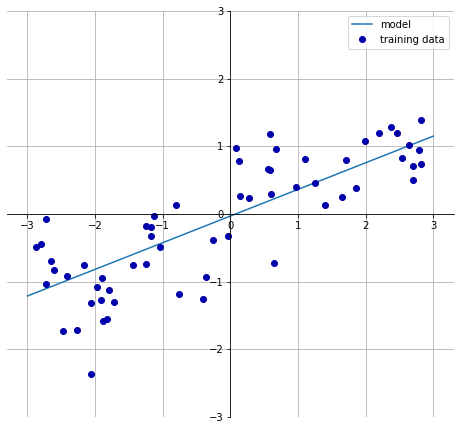

In [12]:
mglearn.plots.plot_linear_regression_wave()

### 선형 회귀(최소제곱법)
 :가장 간단하고, 오래된 선형 알고리즘

In [13]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr =LinearRegression().fit(X_train, y_train)

In [14]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [15]:
print("학습용 데이터 세트 점수: {:.2f}" .format(lr.score(X_train, y_train)))
print("평가용 데이터 세트 점수: {: .2f}" .format(lr.score(X_test, y_test)))

학습용 데이터 세트 점수: 0.67
평가용 데이터 세트 점수:  0.66


### 리지 회귀
 :선형 회귀분석에서 피처수가 많아 과대적합을 방지하기 위해
 
과대적합: 학습용데이터셋에는 매우 높게 일치, 테스트데이터에는 맞지않는 경우

In [16]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터 세트의 형태:", boston.data.shape)

데이터 세트의 형태: (506, 13)


In [17]:
X, y = mglearn.datasets.load_extended_boston( )
print("X.shape:", X.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X.shape: (506, 104)


#### 선형모델 분석

In [18]:
lineR = LinearRegression().fit(X_train, y_train)

print("학습용 데이터 세트 점수: {:.2f}".format(lineR.score(X_train, y_train)))
print("평가용 데이터 세트 점수: {:.2f}".format(lineR.score(X_test, y_test)))

학습용 데이터 세트 점수: 0.95
평가용 데이터 세트 점수: 0.61


#### 리지 회귀 분석

In [19]:
from sklearn.linear_model import Ridge
ridge = Ridge( ).fit(X_train, y_train)
print("학습용 데이터 세트 점수: {:.2f}" .format(ridge.score(X_train, y_train)))
print("평가용 데이터 세트 점수: {:.2f}" .format(ridge.score(X_test, y_test)))

학습용 데이터 세트 점수: 0.89
평가용 데이터 세트 점수: 0.75


#### alpha 값 조정 결과 모델 성능
모델의 단순화 정도를 지정할 수 있다
아주 작은 알파값은 회귀계수 거의 제한하지 않아 선형회귀모델과 거의 같아짐

#### alpha 값 10

In [20]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("학습용 데이터 세트 점수: {:.2f}" .format(ridge10.score(X_train, y_train)))
print("평가용 데이터 세트 점수: {:.2f}" .format(ridge10.score(X_test, y_test)))

학습용 데이터 세트 점수: 0.79
평가용 데이터 세트 점수: 0.64


#### alpha 값 0.1

In [21]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("학습용 데이터 세트 점수: {:.2f}" .format(ridge01.score(X_train, y_train)))
print("평가용 데이터 세트 점수: {:.2f}" .format(ridge01.score(X_test, y_test)))

학습용 데이터 세트 점수: 0.93
평가용 데이터 세트 점수: 0.77


#### 선형 모델과 alpha 값에 다른 회귀 계수 변화

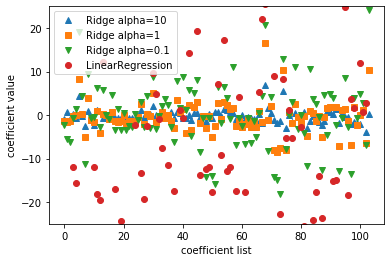

In [22]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lineR.coef_, 'o', label="LinearRegression")
plt.xlabel("coefficient list")
plt.ylabel("coefficient value")
xlims = plt.xlim( )
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend( )

#### 과대적합을 피하기 위해 리지값을 키우지만너무 키우게 되면 너무 일반화가 되어서 예측을 잘 못하는 결과가 나올수도있다

#### 데이터 세트 크기에 따른 모델 성능 변화
규제 효과를 이해하기 위해 alpha 값을 고정하고 학습용 데이터 세트 크기를 변
화시켰을 때, 모델의 성능 변화 -> 학습 곡선 learning curve

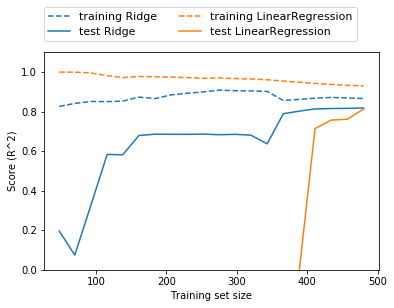

In [23]:
mglearn.plots.plot_ridge_n_samples( )

#### 결과 해석
◦ 데이터 세트 크기가 충분히 크면 리지와선형 회귀 성능이 같아질 것이다         
◦ 데이터 세트 크기가 커질 수록 선형 회귀 학습용 성능이 감소한다